### Logistic Regression Credit Risk

Dataset generado de forma aleatoria para efectos educativos.

### Datos de contacto

- Correo electronico: ortizmontilla@gmail.com


In [ ]:
''' 
pip install xgboost scikit-learn
pip install graphviz xgboost
pip install openpyxl
'''

In [1]:
pwd

'/Users/michael/Documents/Python/ProyestosPersonales/Modelos/statistical_models/xgboots/01 - Credit_risk_model/NOTEBOOKS'

In [2]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Gráficos
import matplotlib.pyplot as plt

# clases
################################################################
from clases import DataAnalyzer
from clases import DataSummary 
from clases import SummaryTableFormatter

In [3]:
# Cargar el conjunto de datos 
data = pd.read_parquet('/Users/michael/Documents/Python/ProyestosPersonales/Modelos/statistical_models/xgboots/01 - Credit_risk_model/DATA/dataset_crediticio_Logict_woe.parquet')
data.head(3)

,resultado_del_riesgo,periodo,edad_WOE,historial_crediticio_WOE,plazo_del_prestamo_WOE,tasa_de_interes_WOE,numero_de_dependientes_WOE,estado_laboral_WOE,proposito_del_prestamo_WOE,estado_civil_WOE,nivel_de_educacion_WOE
0,1,2022-06,0.99,1.00,1.28,1.19,1.13,1.0,1.11,1.05,0.97
1,1,2022-05,1.32,1.03,0.93,0.72,1.06,1.0,1.07,1.05,0.97
2,1,2022-04,1.12,0.97,1.03,1.70,0.98,1.0,0.96,0.96,1.01


### Logistic Regression

In [4]:
# Dividir los datos en conjunto de entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
print(train_data.shape)
print(test_data.shape)

(8000, 11)
(2000, 11)


In [5]:
# Crear una instancia de la clase DataAnalyzer
analyzer = DataAnalyzer()

In [7]:
# Llamar a la función get_na() pasando el DataFrame como argumento
analyzer.get_na(data)

,Variables,Datos sin NAs en Qtd,NAs en Qtd,NAs en %
0,resultado_del_riesgo,10000,0,0.0
1,periodo,10000,0,0.0
2,edad_WOE,10000,0,0.0
3,historial_crediticio_WOE,10000,0,0.0
4,plazo_del_prestamo_WOE,10000,0,0.0
5,tasa_de_interes_WOE,10000,0,0.0
6,numero_de_dependientes_WOE,10000,0,0.0
7,estado_laboral_WOE,10000,0,0.0
8,proposito_del_prestamo_WOE,10000,0,0.0
9,estado_civil_WOE,10000,0,0.0


In [9]:
# Crear una instancia de la clase DataSummary
summary_mark = DataSummary()

In [10]:
# Tasa de malos conjunto de entrenamaiento
summary_mark.summary(train_data,'resultado_del_riesgo')

,Categorias,Qtd,%
0,1,7103,90.0
1,0,897,10.0


In [11]:
# Tasa de malos conjunto de validación
summary_mark.summary(test_data,'resultado_del_riesgo')

,Categorias,Qtd,%
0,1,1789,90.0
1,0,211,10.0


In [12]:
# Definir las columnas predictoras (características) y la variable objetivo
features = ['edad_WOE','historial_crediticio_WOE','plazo_del_prestamo_WOE','tasa_de_interes_WOE',
'numero_de_dependientes_WOE','estado_laboral_WOE','proposito_del_prestamo_WOE','estado_civil_WOE',
'nivel_de_educacion_WOE']
target = 'resultado_del_riesgo'

In [13]:
# Crear el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo en el conjunto de entrenamiento
model.fit(train_data[features], train_data[target])

LogisticRegression()

In [14]:
# Evaluar el modelo en el conjunto de prueba
probabilities = model.predict_proba(test_data[features])[:, 1]
roc_auc = roc_auc_score(test_data[target], probabilities)

In [15]:
# Calcular las métricas de KS y Gini
fpr, tpr, _ = roc_curve(test_data[target], probabilities)
ks = max(tpr - fpr)
gini = 2 * roc_auc - 1

In [16]:
# Imprimir métricas
print("AUC-ROC:", roc_auc)
print("KS:", ks)
print("Gini:", gini)

AUC-ROC: 0.6037157033901224
KS: 0.167307320407228
Gini: 0.20743140678024474


In [17]:
# Calcular el score para cada cliente
train_data['score'] = np.round(model.predict_proba(train_data[features])[:, 1]*1000)

### Tabla resumen distribuciones

In [18]:
# Dividir los datos en deciles naturales según el 'score'
train_data['decil'] = pd.qcut(train_data['score'], q=10, labels=False)

In [21]:
summary_table['No Eventos'].sum()

897

In [23]:
# Supongamos que tienes un DataFrame llamado 'train_data'
summary_formatter = SummaryTableFormatter(train_data)
summary_formatter.generate_summary_table()
formatted_summary_table = summary_formatter.format_table()

formatted_summary_table

,Min_score,Max_score,Eventos,No_Eventos,Event_Rate,NoEvent_Rate,Event_dist,NoEvent_dist,Cumulative_Event_Rate,Cumulative_NoEvent_Rate,KS,Odds
decil,,,,,,,,,,,,
9,944,998,752,34,95.67%,4.33%,11.00%,4.00%,10.59%,3.79%,6.80%,22.1176
8,928,943,727,52,93.32%,6.68%,10.00%,6.00%,20.82%,9.59%,11.23%,13.9808
7,915,927,733,57,92.78%,7.22%,10.00%,6.00%,31.14%,15.94%,15.20%,12.8596
6,903,914,764,77,90.84%,9.16%,11.00%,9.00%,41.90%,24.53%,17.37%,9.9221
5,892,902,718,79,90.09%,9.91%,10.00%,9.00%,52.01%,33.33%,18.67%,9.0886
4,880,891,715,89,88.93%,11.07%,10.00%,10.00%,62.07%,43.26%,18.82%,8.0337
3,867,879,691,100,87.36%,12.64%,10.00%,11.00%,71.80%,54.40%,17.40%,6.9100
2,851,866,704,107,86.81%,13.19%,10.00%,12.00%,81.71%,66.33%,15.38%,6.5794
1,830,850,654,127,83.74%,16.26%,9.00%,14.00%,90.92%,80.49%,10.43%,5.1496


In [ ]:
formatted_table.to_excel('/Users/michael/Documents/Python/ProyestosPersonales/Modelos/statistical_models/xgboots/01 - Credit_risk_model/REPORTS/Performance.xlsx')

### Resumen gráfico

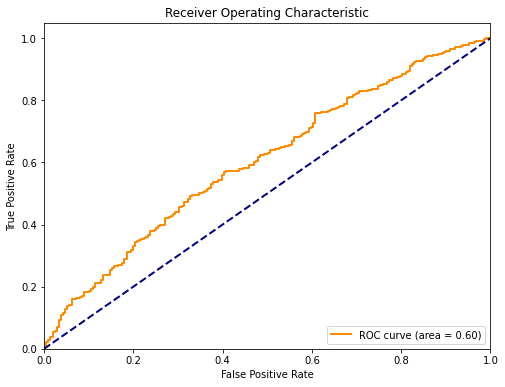

In [24]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

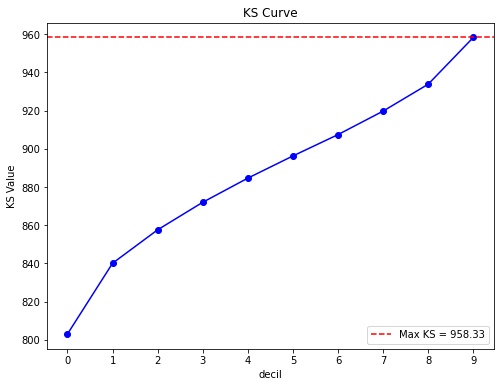

In [25]:
# Calcular las métricas de KS en cada decil
grouped = train_data.groupby('decil', as_index=False).agg({'resultado_del_riesgo': 'mean', 'score': 'mean'})
ks_by_decil = np.abs(grouped['resultado_del_riesgo'] - grouped['score'])
ks_max = max(ks_by_decil)

# Graficar la curva KS
plt.figure(figsize=(8, 6))
plt.plot(grouped['decil'], ks_by_decil, marker='o', color='b')
plt.axhline(ks_max, color='r', linestyle='--', label='Max KS = {:.2f}'.format(ks_max))
plt.xlabel('decil')
plt.ylabel('KS Value')
plt.title('KS Curve')
plt.xticks(grouped['decil'])
plt.legend()
plt.show()